# Importing Datasets 



In [188]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [189]:
!ls

 Week2_Data_Wrangling_and_Visual_Exploration.ipynb   sales_data.csv
 customer_info.csv				    'week 2.ipynb'
 product_info.csv


In [190]:
customer_df = pd.read_csv('customer_info.csv')
product_df = pd.read_csv("product_info.csv")
sales_df = pd.read_csv("sales_data.csv")

First let's understand the type of data we are dealing with

# Understanding the data & Cleaning 



## customer_df 



In [191]:
customer_df.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [192]:
customer_df.tail()

,customer_id,email,signup_date,gender,region,loyalty_tier
495,C00496,simsjohn@wiley.net,19-02-25,femle,Central,GOLD
496,C00497,cameronwilliams@yahoo.com,30-12-24,NaN,West,GOLD
497,C00498,ibarron@yahoo.com,21-06-25,male,South,Silver
498,C00499,karen26@gmail.com,02-10-24,Female,North,gold
499,C00500,jasonjohnson@jackson.com,28-11-24,Male,North,gold


In [193]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [194]:
customer_df.shape

(500, 6)

We can observe that there might be missing values since there are 500 observations but all columns don't have 500 entries.

In [195]:
customer_df.isnull().sum()

customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64

As expected, now let's check if there are any duplicates in the data

In [196]:
customer_df.duplicated().sum()

0

No duplicates in this dataset

Now let's check what are the other issues in this data

In [197]:
customer_df.columns

Index(['customer_id', 'email', 'signup_date', 'gender', 'region',
       'loyalty_tier'],
      dtype='object')

### signup_date



In [198]:
customer_df['signup_date'].isna().sum()

4

In [199]:
customer_df['signup_date'] = pd.to_datetime(customer_df['signup_date'], format='%d-%m-%y')

### gender column



In [200]:
customer_df.gender.unique()

array(['Male', 'Female', 'male', 'FEMALE', 'Other', 'femle', nan],
      dtype=object)

Text format is not consistent in the `gender` column

In [201]:
customer_df.region.unique()

array(['Central', 'West', 'North', 'South', 'East', nan], dtype=object)

In [202]:
customer_df.loyalty_tier.unique()

array(['Silver', ' gold ', 'GOLD', 'bronze', 'gld', nan, 'brnze',
       'sllver'], dtype=object)

Text format is not consistent in the `loyalty_tier` column

Problems to fix:  
- inconsistent text format
- missing values

#### inconsistent text format



In [203]:
customer_df.gender = customer_df.gender.str.lower()

In [204]:
customer_df.gender.unique()

array(['male', 'female', 'other', 'femle', nan], dtype=object)

In [205]:
customer_df.gender.isna().sum()

4

In [206]:
customer_df.replace({"gender" : 'femle'}, "female", inplace=True)

In [207]:
customer_df.gender.mode()[0]

'female'

In [208]:
customer_df.gender.value_counts()

gender
female    250
male      169
other      77
Name: count, dtype: int64

In [209]:
customer_df.gender.fillna(customer_df.gender.mode()[0], inplace=True)

/tmp/ipykernel_347/167866279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df.gender.fillna(customer_df.gender.mode()[0], inplace=True)


In [210]:
customer_df.gender.isna().sum()

0

In [211]:
customer_df.gender.unique()

array(['male', 'female', 'other'], dtype=object)

### email column



In [212]:
customer_df.email.isna().sum()

6

In [213]:
customer_df.email.fillna("unknown", inplace=True)

/tmp/ipykernel_347/2047012413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df.email.fillna("unknown", inplace=True)


In [214]:
customer_df.email.isna().sum()

0

### region column



In [215]:
customer_df.region.unique()

array(['Central', 'West', 'North', 'South', 'East', nan], dtype=object)

In [216]:
customer_df.region.mode()[0]

'East'

In [217]:
customer_df.region.value_counts()

region
East       103
North      101
West       100
South       99
Central     94
Name: count, dtype: int64

In [218]:
customer_df.region.fillna(customer_df.region.mode()[0], inplace=True)

/tmp/ipykernel_347/3578319264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df.region.fillna(customer_df.region.mode()[0], inplace=True)


In [219]:
customer_df.region.unique()

array(['Central', 'West', 'North', 'South', 'East'], dtype=object)

In [220]:
customer_df.region.isna().sum()

0

### loyalty_tier



In [221]:
customer_df.loyalty_tier.unique()

array(['Silver', ' gold ', 'GOLD', 'bronze', 'gld', nan, 'brnze',
       'sllver'], dtype=object)

In [222]:
customer_df.loyalty_tier = customer_df.loyalty_tier.str.lower()

In [223]:
customer_df.replace({"loyalty_tier" :"gld"}, "gold", inplace=True)
customer_df.replace({"loyalty_tier" :"brnze"}, "bronze", inplace=True)
customer_df.replace({"loyalty_tier" :"sllver"}, "silver", inplace=True)


In [224]:
customer_df.loyalty_tier.unique()

array(['silver', ' gold ', 'gold', 'bronze', nan], dtype=object)

In [225]:
customer_df.loyalty_tier.value_counts()

loyalty_tier
gold      151
silver    119
 gold     114
bronze    114
Name: count, dtype: int64

In [226]:
customer_df.loyalty_tier = customer_df.loyalty_tier.str.strip()

In [227]:
customer_df.loyalty_tier.value_counts()

loyalty_tier
gold      265
silver    119
bronze    114
Name: count, dtype: int64

In [228]:
customer_df.loyalty_tier.fillna(customer_df.loyalty_tier.mode()[0], inplace=True)

/tmp/ipykernel_347/1415719829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df.loyalty_tier.fillna(customer_df.loyalty_tier.mode()[0], inplace=True)


In [229]:
customer_df.loyalty_tier.isna().sum()

0

### customer_id



In [230]:
customer_df.customer_id.isna().sum()

3

The big issue here is we are going to merge the dataframes later and assigning missing values to `unknown` will cause problems.  
Thus i will drop them.

In [231]:
customer_df = customer_df.dropna(subset=["customer_id"])

In [232]:
customer_df.customer_id.isna().sum()

0

## product_df



In [233]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


In [234]:
product_df.shape

(30, 6)

It seems there are no missing value, let's check

In [235]:
product_df.isna().sum()

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

In [236]:
product_df.duplicated().sum()

0

Neither missing values nor duplicates in the data

In [237]:
product_df.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [238]:
product_df.tail()

,product_id,product_name,category,launch_date,base_price,supplier_code
25,P0026,Storage Product 50,Storage,08-02-25,27.06,S952
26,P0027,Outdoors Product 55,Outdoors,21-09-24,23.05,S127
27,P0028,Outdoors Product 53,Outdoors,10-04-25,34.28,S587
28,P0029,Cleaning Product 69,Cleaning,15-03-25,23.41,S424
29,P0030,Cleaning Product 72,Cleaning,04-04-25,9.77,S455


In [239]:
product_df['launch_date'] = pd.to_datetime(product_df['launch_date'], format="%d-%m-%y")

### Checking the columns



In [240]:
product_df.category.unique()

array(['Storage', 'Cleaning', 'Kitchen', 'Personal Care', 'Outdoors'],
      dtype=object)

In [241]:
product_df.product_name.unique()

array(['Storage Product 39', 'Cleaning Product 82', 'Cleaning Product 85',
       'Kitchen Product 82', 'Personal Care Product 1',
       'Cleaning Product 16', 'Personal Care Product 64',
       'Storage Product 47', 'Outdoors Product 13', 'Cleaning Product 70',
       'Kitchen Product 53', 'Cleaning Product 29', 'Cleaning Product 94',
       'Outdoors Product 91', 'Storage Product 10', 'Cleaning Product 53',
       'Personal Care Product 11', 'Storage Product 37',
       'Kitchen Product 42', 'Cleaning Product 40', 'Kitchen Product 70',
       'Cleaning Product 86', 'Outdoors Product 32', 'Storage Product 87',
       'Cleaning Product 84', 'Storage Product 50', 'Outdoors Product 55',
       'Outdoors Product 53', 'Cleaning Product 69',
       'Cleaning Product 72'], dtype=object)

Checking all values are greater than 0

In [242]:
(product_df.base_price < 0).sum()

0

In [243]:
product_df.supplier_code.unique()

array(['S339', 'S974', 'S745', 'S589', 'S559', 'S980', 'S379', 'S788',
       'S695', 'S321', 'S645', 'S481', 'S914', 'S876', 'S466', 'S715',
       'S594', 'S767', 'S993', 'S492', 'S643', 'S924', 'S907', 'S558',
       'S503', 'S952', 'S127', 'S587', 'S424', 'S455'], dtype=object)

## sales_df


In [244]:
sales_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-25,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-25,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,06-07-25,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,06-07-25,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,06-07-25,DELAYED,Credit Card,West,0.20


In [245]:
sales_df.tail()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
2995,O868860,C00233,P0001,5,43.40,06-07-25,Delivered,Bank Transfer,West,0.2
2996,O949709,C00246,P0029,4,34.04,06-07-25,DELAYED,Bank Transfer,West,0.2
2997,O763639,C00182,P0026,1,42.34,06-07-25,Delivered,credit card,South,0.0
2998,O753958,C00074,P0003,5,35.96,06-07-25,Delivered,Credit Card,Central,0.0
2999,O929624,C00405,P0004,3,43.23,06-07-25,delivered,Credit Card,West,0.1


In [246]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2997 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [247]:
sales_df.shape

(3000, 10)

In [248]:
sales_df.isna().sum()

order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64

In [249]:
sales_df["order_date"].fillna("06-07-25", inplace=True)

/tmp/ipykernel_347/1228291541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df["order_date"].fillna("06-07-25", inplace=True)


In [250]:
sales_df["order_date"] = pd.to_datetime(sales_df["order_date"], format="%d-%m-%y")

In [251]:
sales_df["order_date"].unique()

<DatetimeArray>
['2025-07-06 00:00:00']
Length: 1, dtype: datetime64[ns]

In [252]:
sales_df.duplicated().sum()

0

### unit_price column



In [253]:
sales_df.unit_price.isna().sum()

1

In [254]:
(sales_df.unit_price  < 0).sum()

0

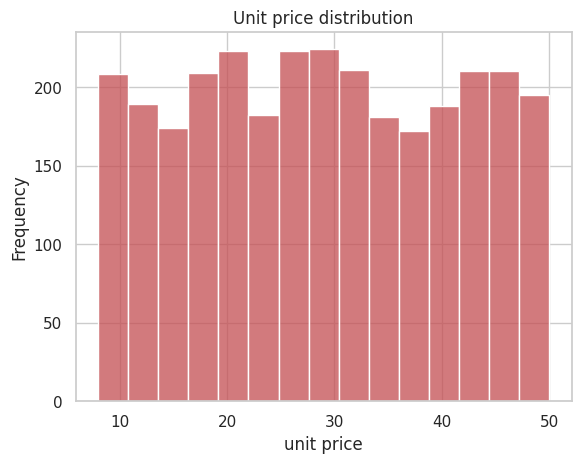

In [255]:
sns.set(style="whitegrid")

sns.histplot(data=sales_df, x="unit_price", color="r")
plt.xlabel("unit price")
plt.ylabel("Frequency")
plt.title("Unit price distribution")
plt.show()

Based on the graph above, we can use the mean to fill the missing value

In [256]:
np.round(sales_df.unit_price.mean(),2)

28.95

In [257]:
sales_df.unit_price.fillna(np.round(sales_df.unit_price.mean(),2), inplace=True)

/tmp/ipykernel_347/1813843688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df.unit_price.fillna(np.round(sales_df.unit_price.mean(),2), inplace=True)


In [258]:
sales_df.unit_price.isna().sum()

0

### discount_applied



In [259]:
(sales_df.discount_applied < 0).sum()

0

In [260]:
sales_df.discount_applied.unique()

array([0.  , 0.15, 0.2 , 0.1 , 0.05,  nan])

In [261]:
sales_df.discount_applied.isna().sum()

517

In [262]:
sales_df.discount_applied.value_counts()

discount_applied
0.15    510
0.10    506
0.05    505
0.20    483
0.00    479
Name: count, dtype: int64

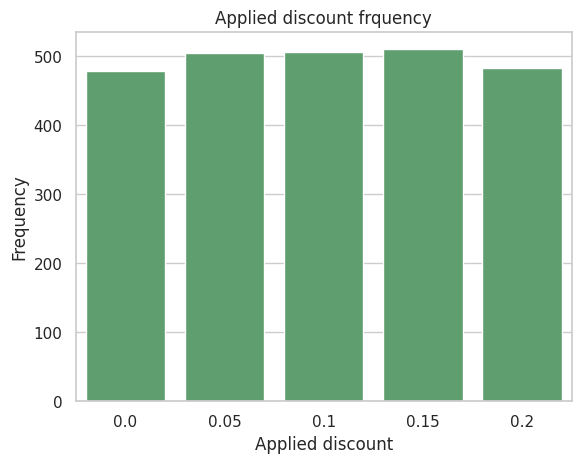

In [263]:
sns.countplot(data= sales_df, x="discount_applied", color='g')
plt.xlabel("Applied discount")
plt.ylabel("Frequency")
plt.title("Applied discount frquency")
plt.show()

Based on the graph above, assigning the 517 missing values to the mode would significantly distort the data, as the number of missing entries is quite significant.  
So taking the mean would make the most sense. 

In [264]:
sales_df.discount_applied.fillna(np.round(sales_df.discount_applied.mean(),2), inplace=True)

/tmp/ipykernel_347/1231261863.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df.discount_applied.fillna(np.round(sales_df.discount_applied.mean(),2), inplace=True)


In [265]:
sales_df.discount_applied.value_counts()

discount_applied
0.10    1023
0.15     510
0.05     505
0.20     483
0.00     479
Name: count, dtype: int64

### delivery_status



In [266]:
sales_df.delivery_status.unique()

array(['Delivered', ' DELAYED', 'delivered', ' Cancelled ', 'Delayed',
       'delrd', 'delyd', nan], dtype=object)

In [267]:
sales_df.delivery_status = sales_df.delivery_status.str.lower().str.strip()

In [268]:
sales_df.delivery_status.unique()

array(['delivered', 'delayed', 'cancelled', 'delrd', 'delyd', nan],
      dtype=object)

In [269]:
sales_df.replace({"delivery_status" :"delrd"}, "delivered", inplace=True)
sales_df.replace({"delivery_status" :"delyd"}, "delayed", inplace=True)

In [270]:
sales_df.delivery_status.unique()

array(['delivered', 'delayed', 'cancelled', nan], dtype=object)

In [271]:
sales_df.delivery_status.fillna("unknown", inplace=True)

/tmp/ipykernel_347/846313070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df.delivery_status.fillna("unknown", inplace=True)


### payment_method



In [272]:
sales_df.payment_method.unique()

array(['PayPal', 'credit card', 'Bank Transfer', 'Credit Card', nan,
       'bank transfr'], dtype=object)

In [273]:
sales_df.replace({"payment_method" : "credit card"}, "Credit Card", inplace=True)
sales_df.replace({"payment_method" : "bank transfr"}, "Bank Transfer", inplace=True)

In [274]:
sales_df.payment_method.fillna("Unknown", inplace=True)

/tmp/ipykernel_347/1175314897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df.payment_method.fillna("Unknown", inplace=True)


In [275]:
sales_df.payment_method.unique()

array(['PayPal', 'Credit Card', 'Bank Transfer', 'Unknown'], dtype=object)

### region



In [276]:
sales_df.region.unique()

array(['Central', 'North', 'West', 'East', 'South', 'nrth'], dtype=object)

In [277]:
sales_df.replace({"region" : "nrth"}, "North", inplace=True)


### quantity



In [278]:
sales_df.quantity.unique()

array(['3', '5', '1', '2', '4', nan, 'three', 'five'], dtype=object)

In [279]:
sales_df.replace({"quantity" : "three"}, "3", inplace=True)
sales_df.replace({"quantity" : "five"}, "5", inplace=True)

In [280]:
sales_df.quantity.isna().sum()

3

In [281]:
sales_df.quantity.mode()[0]

'2'

In [282]:
sales_df.quantity.fillna(sales_df.quantity.mode()[0], inplace=True)

/tmp/ipykernel_347/2267625622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df.quantity.fillna(sales_df.quantity.mode()[0], inplace=True)


In [283]:
sales_df.quantity = sales_df.quantity.astype("int64")

In [284]:
sales_df.quantity.dtype

dtype('int64')

### product_id



In [285]:
sales_df.product_id.isna().sum()

5

In [286]:
sales_df.fillna("unknown" , inplace=True)

# Merging the Data



In [287]:
sales_df.shape

(3000, 10)

In [289]:
merged_df = pd.merge(sales_df, product_df, on=['product_id'] , how='left'
                    ).merge(customer_df, on=['customer_id'], how='left').rename(columns={"region_y" : "customer_region", "region_x" : "sales_region"})

In [290]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          3000 non-null   object        
 1   customer_id       3000 non-null   object        
 2   product_id        3000 non-null   object        
 3   quantity          3000 non-null   int64         
 4   unit_price        3000 non-null   float64       
 5   order_date        3000 non-null   datetime64[ns]
 6   delivery_status   3000 non-null   object        
 7   payment_method    3000 non-null   object        
 8   sales_region      3000 non-null   object        
 9   discount_applied  3000 non-null   float64       
 10  product_name      2995 non-null   object        
 11  category          2995 non-null   object        
 12  launch_date       2995 non-null   datetime64[ns]
 13  base_price        2995 non-null   float64       
 14  supplier_code     2995 n

In [291]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier
0,O966977,C00397,P0022,3,39.25,2025-07-06,delivered,PayPal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,female,North,silver
1,O696648,C00236,P0023,5,18.92,2025-07-06,delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,other,North,gold
2,O202644,C00492,P0011,1,29.68,2025-07-06,delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,male,Central,gold
3,O501803,C00031,P0003,1,32.76,2025-07-06,cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,female,Central,gold
4,O322242,C00495,P0016,1,47.62,2025-07-06,delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,male,Central,gold


# Feature Engineering



In [292]:
merged_df["revenue"] = merged_df["quantity"] * merged_df["unit_price"] * (1 - merged_df["discount_applied"])

In [293]:
merged_df["order_week"] = merged_df["order_date"].dt.isocalendar().week

In [294]:
bins = [0, 15, 30, float("inf") ]
labels = ["Low", "Medium", "High"]

merged_df["price_band"] = pd.cut(merged_df["unit_price"], bins=bins, labels=labels, right=False)

In [295]:
merged_df["days_to_order"] = merged_df["order_date"] - merged_df["launch_date"]

In [296]:
merged_df["email"].fillna("unknown", inplace=True)

/tmp/ipykernel_347/3123355071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["email"].fillna("unknown", inplace=True)


In [297]:
def apply_pattern(text):
    """Applies regular expression search pattern to provided string."""
    matchObject = re.search(r'@([\w\.-]+)', text)
    return matchObject.group(1) if matchObject else None

merged_df["email_domain"] = merged_df["email"].apply(apply_pattern)

In [298]:
merged_df["is_late"] = (merged_df["delivery_status"] == "delayed")

# Summary Tables & EDA



### Weekly revenue trends by region



In [299]:
weekly_revenue = merged_df.groupby(['order_week', 'sales_region'])["revenue"].sum().reset_index()
weekly_revenue

,order_week,sales_region,revenue
0,27,Central,46549.9595
1,27,East,47329.6400
2,27,North,45977.9905
3,27,South,48882.1180
4,27,West,47340.5780


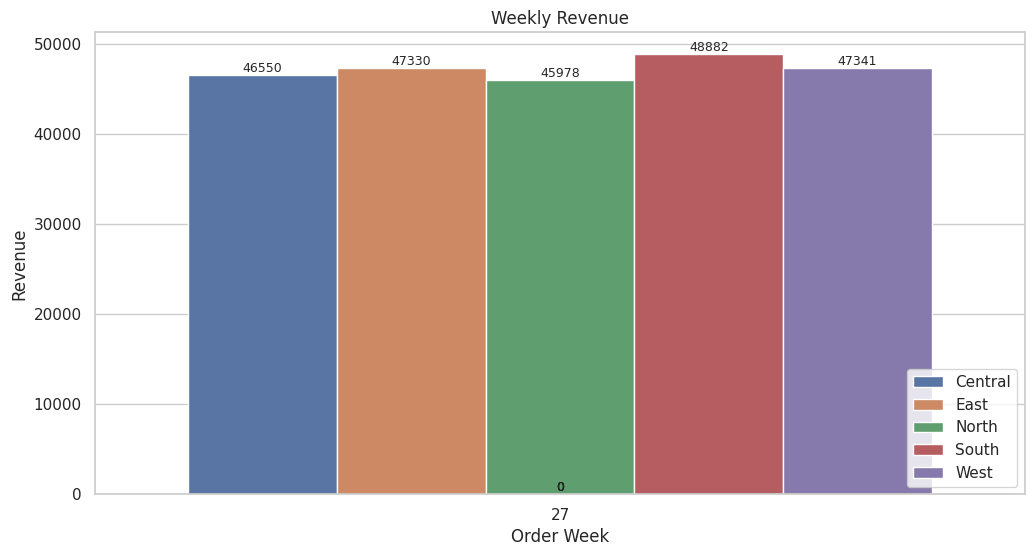

In [300]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=weekly_revenue, x="order_week", y="revenue", hue="sales_region")


ax.set(title="Weekly Revenue", xlabel="Order Week", ylabel="Revenue")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)
    
ax.legend(loc='lower right')

plt.show()

### Product category performance




In [301]:
category_performance = merged_df.groupby("category")[[ 'discount_applied',"quantity", "revenue"]].sum().reset_index()
category_performance

,category,discount_applied,quantity,revenue
0,Cleaning,123.85,3593,92009.0850
1,Kitchen,38.75,1229,33163.9485
2,Outdoors,49.80,1525,39489.4300
3,Personal Care,31.10,902,24566.1895
4,Storage,56.40,1735,46240.9765


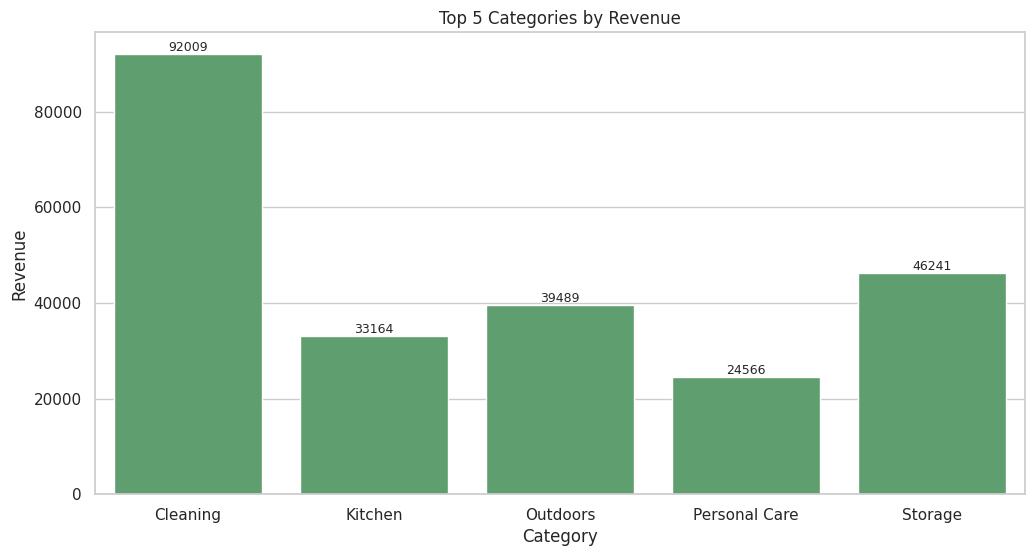

In [302]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=category_performance, x="category", y="revenue", color='g')
ax.set(title="Top 5 Categories by Revenue", xlabel="Category", ylabel="Revenue")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)

plt.show()

In [303]:
category_performance_region_pivot = merged_df[["category", "sales_region", "revenue"]].pivot_table(index=["category", "sales_region"]
                                                                        , aggfunc="sum").reset_index().pivot(index="category", columns=["sales_region"], values="revenue").round(1)
category_performance_region_pivot

sales_region,Central,East,North,South,West
category,,,,,
Cleaning,17622.8,19635.0,18390.0,18633.1,17728.2
Kitchen,6295.1,6532.8,6154.4,7578.5,6603.1
Outdoors,7771.5,7119.8,7679.5,9180.9,7737.7
Personal Care,5578.2,4570.0,5134.3,4156.5,5127.1
Storage,9282.3,9408.7,8517.4,9177.3,9855.3


In [304]:
category_performance_region = merged_df.groupby(["category", "sales_region"])[[ 'discount_applied',"quantity", "revenue"]].sum().reset_index()

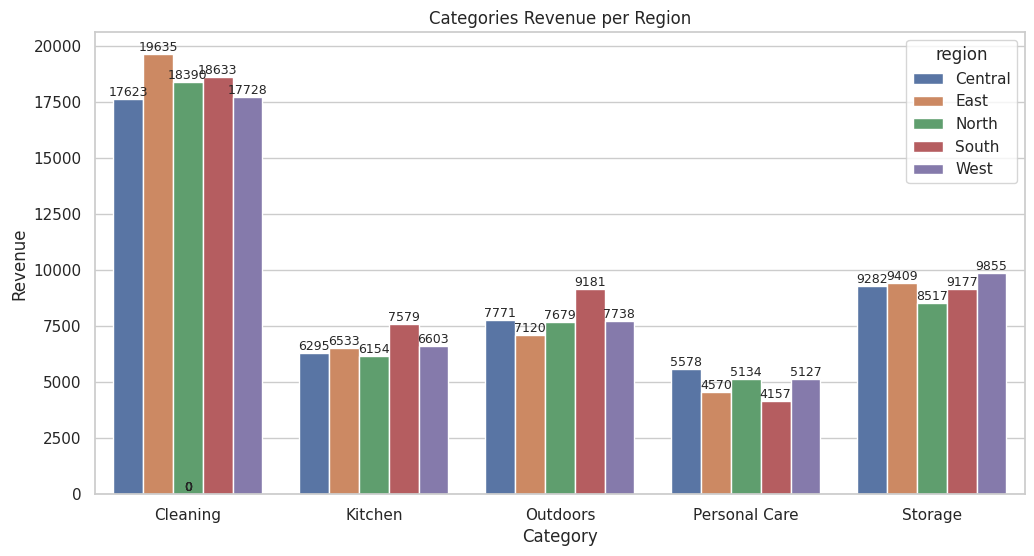

In [305]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=category_performance_region, x="category", y="revenue", hue="sales_region")
ax.set(title="Categories Revenue per Region", xlabel="Category", ylabel="Revenue")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)
plt.legend(title="region")
plt.show()

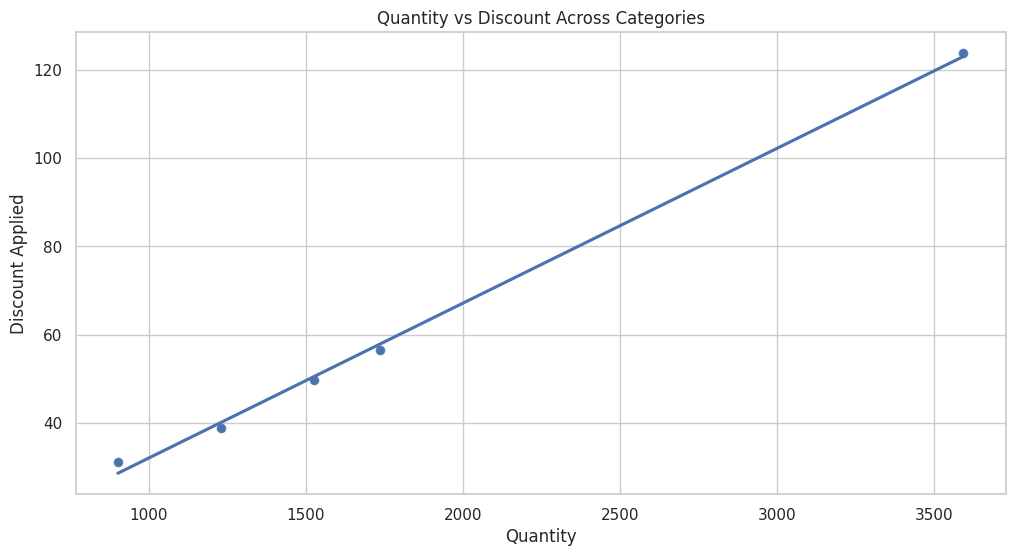

In [306]:
plt.figure(figsize=(12,6))

ax = sns.scatterplot(data=category_performance, x="quantity", y="discount_applied")
sns.regplot(data=category_performance, x="quantity", y="discount_applied", ax=ax, ci=None)
ax.set(title="Quantity vs Discount Across Categories", xlabel="Quantity", ylabel="Discount Applied")
plt.show()

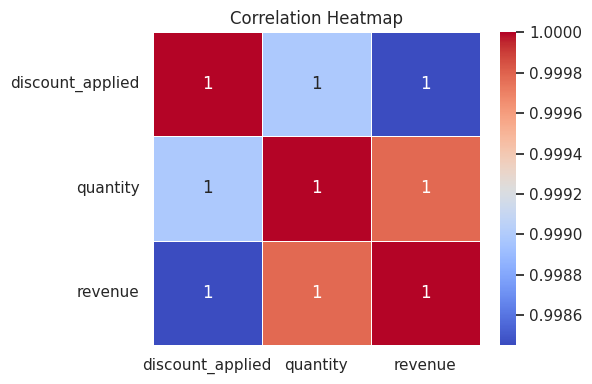

In [307]:
plt.figure(figsize=(6, 4))

corr = category_performance.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
ax.tick_params(axis = 'y' , rotation=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Customer behaviour




In [308]:
#Sign up month
merged_df["signup_month"] = merged_df["signup_date"].dt.month

In [309]:
customer_behaviour = merged_df[["loyalty_tier", "signup_month","order_id"]].pivot_table(index=["signup_month","loyalty_tier", ], aggfunc='count')
customer_behaviour = customer_behaviour.reset_index().pivot(index="signup_month", columns="loyalty_tier", values="order_id")
customer_behaviour

loyalty_tier,bronze,gold,silver
signup_month,,,
1.0,57,144,36
2.0,55,156,66
3.0,34,133,75
4.0,53,93,51
5.0,41,120,44
6.0,86,63,61
7.0,57,144,41
8.0,46,187,44
9.0,36,150,53


In [310]:
customer_behaviour_chart = merged_df.groupby(["signup_month", "loyalty_tier"])["order_id"].count().reset_index()


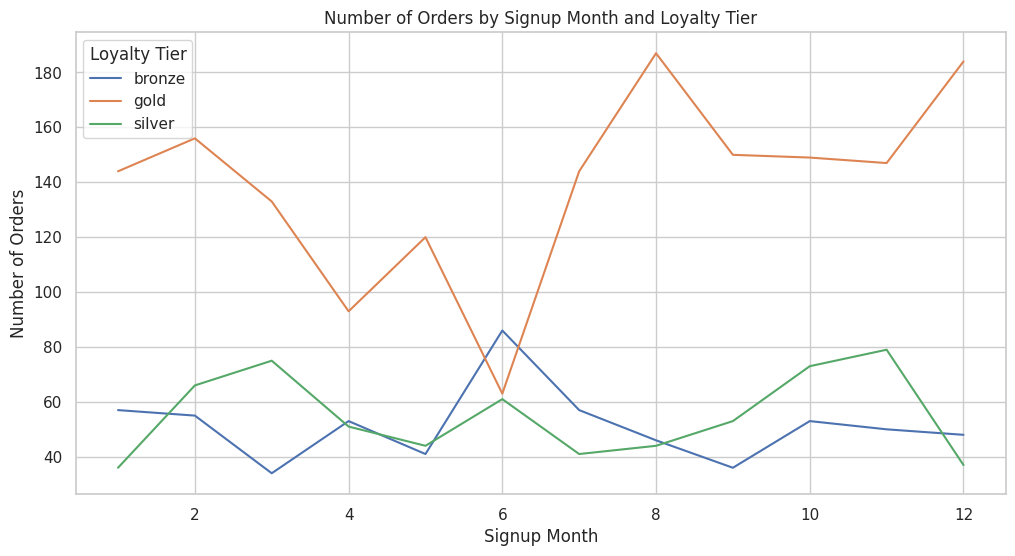

In [311]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=customer_behaviour_chart, x="signup_month", y="order_id", hue="loyalty_tier")

ax.set(title="Number of Orders by Signup Month and Loyalty Tier", xlabel="Signup Month", ylabel="Number of Orders")
ax.legend(title='Loyalty Tier')
plt.show()

In [312]:
revenue_month = merged_df.groupby(["signup_month"])["revenue"].sum().reset_index().round(1)
revenue_month

,signup_month,revenue
0,1.0,17378.6
1,2.0,23209.3
2,3.0,19461.4
3,4.0,15030.9
4,5.0,15666.0
5,6.0,16718.2
6,7.0,19179.7
7,8.0,23477.7
8,9.0,18333.3
9,10.0,22036.2


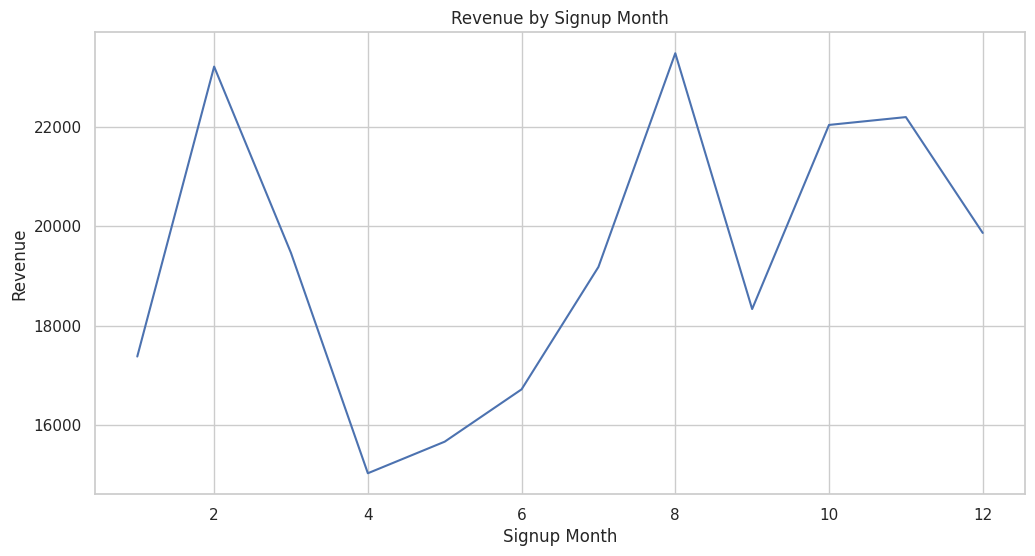

In [313]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=revenue_month, x="signup_month", y="revenue")

ax.set(title="Revenue by Signup Month", xlabel="Signup Month", ylabel="Revenue")

plt.show()

In [314]:
region_customer_revenue = merged_df.groupby(["customer_region", "gender"])["revenue"].sum().reset_index()
region_customer_revenue

,customer_region,gender,revenue
0,Central,female,20967.6240
1,Central,male,14478.3210
2,Central,other,7231.1555
3,East,female,26572.4580
4,East,male,16684.9635
5,East,other,6589.1240
6,North,female,23376.3510
7,North,male,17826.0860
8,North,other,7264.7380
9,South,female,24495.2640


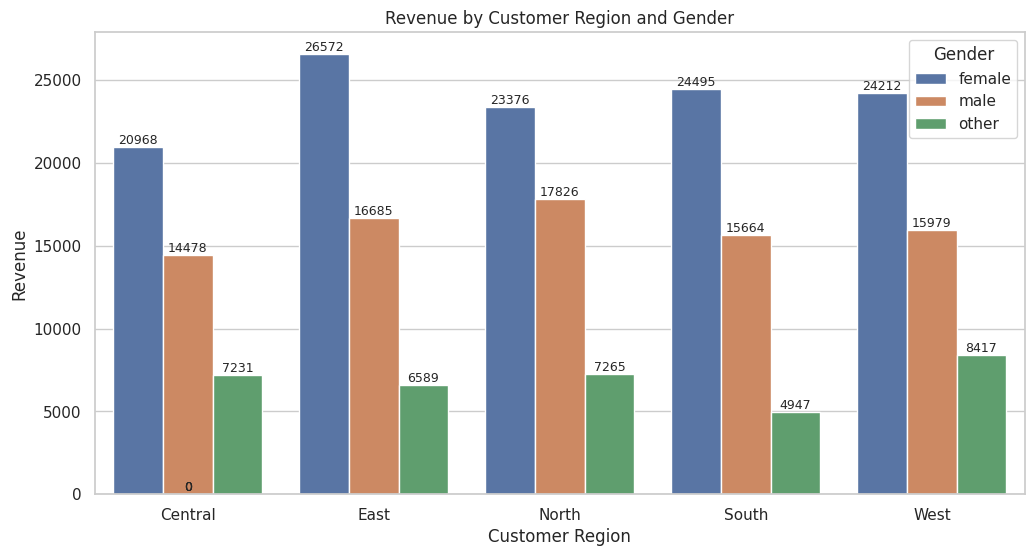

In [315]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=region_customer_revenue, x='customer_region', y='revenue', hue='gender')
ax.set(title= ('Revenue by Customer Region and Gender'), xlabel=('Customer Region'), ylabel=('Revenue'))


for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)

plt.legend(title='Gender')

plt.show()

### Delivery performance



In [316]:
delivery_performance = merged_df[['sales_region',"price_band", "delivery_status","order_id"]].pivot_table(index=['sales_region',"price_band", "delivery_status"],aggfunc="count" )
delivery_performance = delivery_performance.reset_index().pivot(index="sales_region", columns=["price_band","delivery_status"], values="order_id")
delivery_performance

/tmp/ipykernel_347/3030702591.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  delivery_performance = merged_df[['sales_region',"price_band", "delivery_status","order_id"]].pivot_table(index=['sales_region',"price_band", "delivery_status"],aggfunc="count" )


price_band            Low                              Medium          \
delivery_status cancelled delayed delivered unknown cancelled delayed   
sales_region                                                            
Central                26      43        44       0        49      88   
East                   21      40        35       0        33     102   
North                  24      41        41       1        35      91   
South                  24      33        41       0        40      72   
West                   13      30        34       0        63      87   

price_band                             High                            
delivery_status delivered unknown cancelled delayed delivered unknown  
sales_region                                                           
Central                88       0        50     104       110       1  
East                  104       0        44     109       113       1  
North                  80       0        58     106       129       0  
South                  89       0        53     125       119       0  
West                   96       0        58     103       109       0

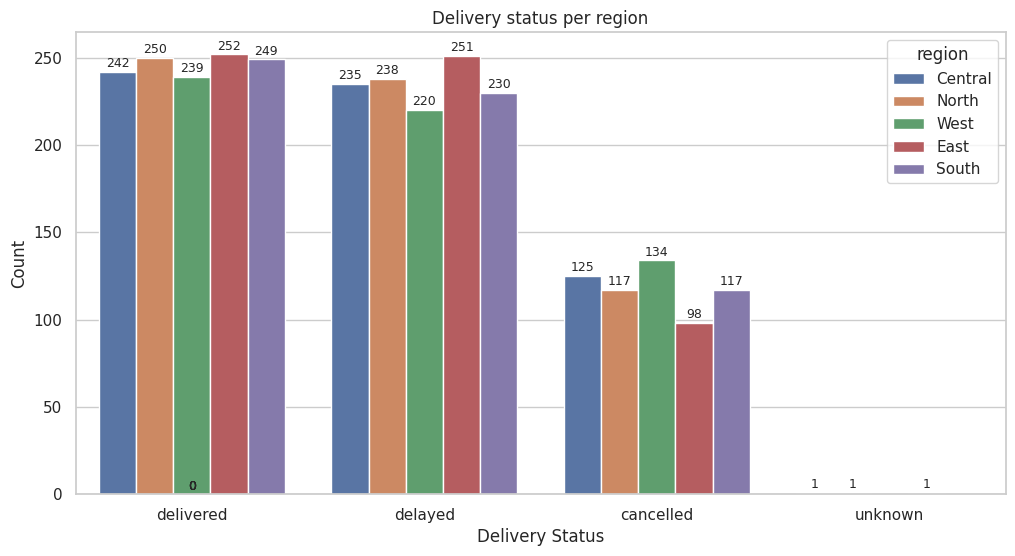

In [317]:
plt.figure(figsize=(12,6))

ax = sns.countplot(merged_df, x="delivery_status", hue="sales_region")
ax.set(title="Delivery status per region", xlabel="Delivery Status", ylabel="Count")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)
plt.legend(title="region")
plt.show()

### Preferred payment methods



In [318]:
preferred_payment = merged_df[["loyalty_tier", "payment_method", "order_id"]].pivot_table(index=["loyalty_tier", "payment_method"], aggfunc="count"
                                                                     ).reset_index().pivot(index="loyalty_tier", columns="payment_method", values="order_id")
preferred_payment

payment_method,Bank Transfer,Credit Card,PayPal,Unknown
loyalty_tier,,,,
bronze,179.0,284.0,163.0,NaN
gold,406.0,847.0,433.0,2.0
silver,191.0,306.0,162.0,1.0


### Orders by loyalty tier



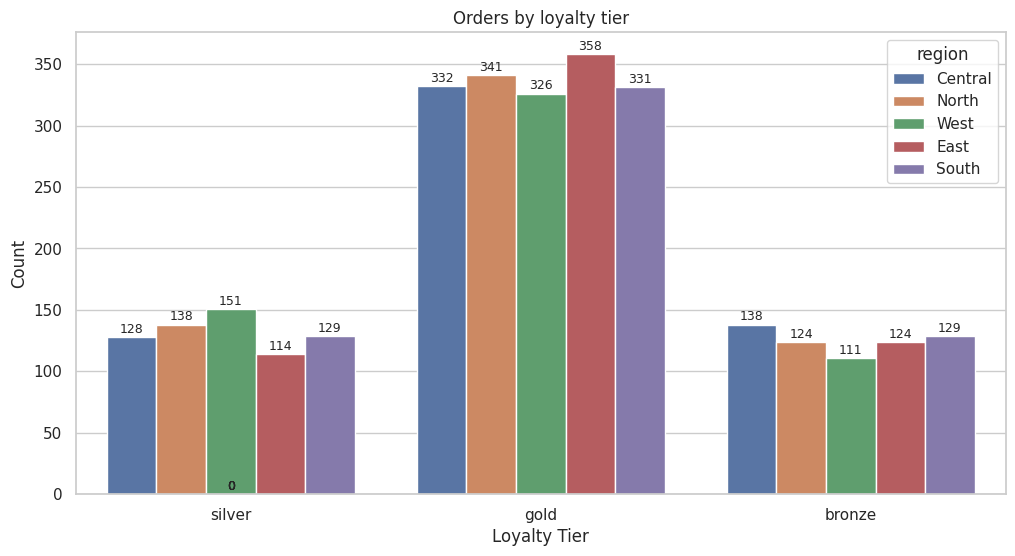

In [319]:
plt.figure(figsize=(12,6))

ax = sns.countplot(merged_df, x="loyalty_tier", hue="sales_region")
ax.set(title="Orders by loyalty tier", xlabel="Loyalty Tier", ylabel="Count")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)
plt.legend(title="region")
plt.show()

### Revenue by loyalty tier



In [320]:
loyalty_tier_revenue = merged_df.groupby(["loyalty_tier"])['revenue'].sum().reset_index()
loyalty_tier_revenue

,loyalty_tier,revenue
0,bronze,48114.1215
1,gold,135171.9520
2,silver,51418.6550


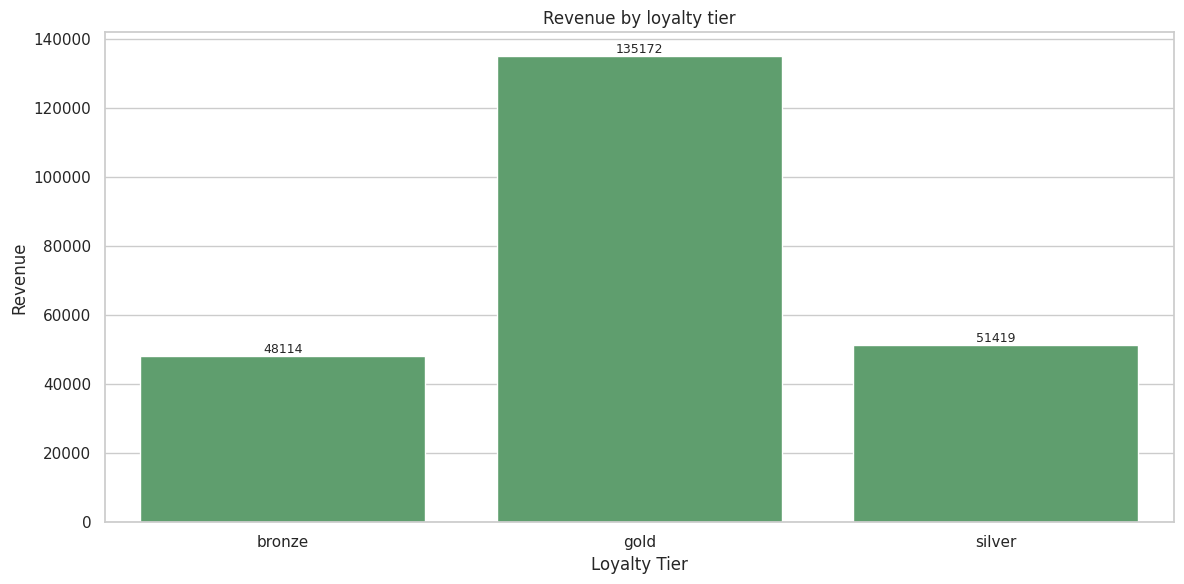

In [321]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=loyalty_tier_revenue, x="loyalty_tier", y="revenue", color='g')
ax.set(title="Revenue by loyalty tier", xlabel="Loyalty Tier", ylabel="Revenue")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### Delivery status by price band



In [322]:
delivery_status = merged_df.groupby(['price_band', "delivery_status"])["order_id"].count().reset_index()
delivery_status = delivery_status.pivot(index="price_band", columns="delivery_status", values="order_id")
delivery_status

/tmp/ipykernel_347/3866653908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_status = merged_df.groupby(['price_band', "delivery_status"])["order_id"].count().reset_index()


delivery_status,cancelled,delayed,delivered,unknown
price_band,,,,
Low,108,187,195,1
Medium,220,440,457,0
High,263,547,580,2


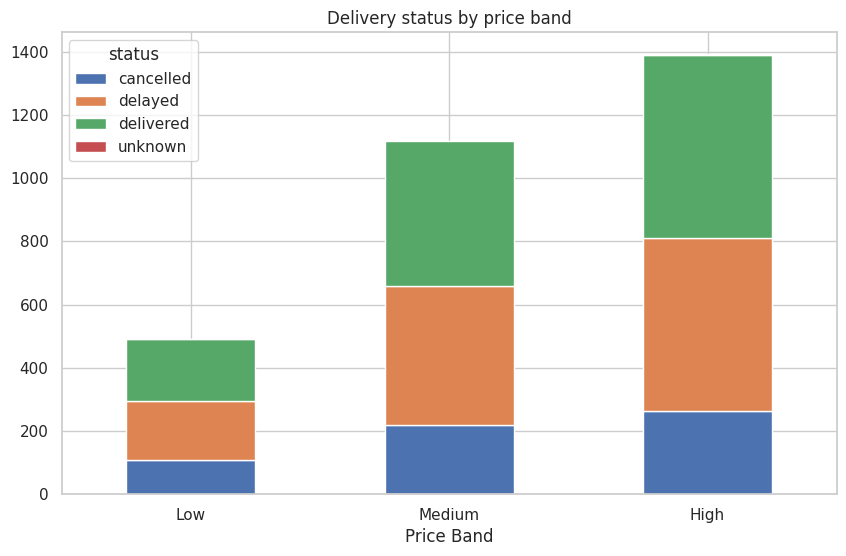

In [323]:
ax = delivery_status.plot(kind="bar", stacked="True", title="Delivery status by price band", figsize=(10, 6))
ax.tick_params(axis = 'x' , rotation=0)
plt.xlabel("Price Band")
plt.legend(title="status")
plt.show()